### This notebook is used to feature selection

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics                           
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

#### Importing data

In [207]:
tr_val=pd.read_csv("data/train_values.csv") #train_values

tr_labels=pd.read_csv("data/train_labels.csv",usecols=["status_group"]) #train_values  59,400
train=pd.concat([tr_val, tr_labels], axis=1) # train

test=pd.read_csv("data/test_values.csv") #test_values 14,850

# .reset_index(drop=True)
df_all=pd.concat([train, test]).reset_index(drop=True) #concatinating train and test data frames  50785

Eventhough spliting date_recorded gives three column it didn't contribute to any accuracy gain

In [209]:
# df_all['date_recorded']= pd.to_datetime(df_all['date_recorded'],format='%Y-%m-%d') #Creating year,month,date columns from date feature
# df_all['ryear'] = pd.DatetimeIndex(df_all['date_recorded']).year
# df_all['rmonth'] = pd.DatetimeIndex(df_all['date_recorded']).month
# df_all['rday'] = pd.DatetimeIndex(df_all['date_recorded']).day

##### Dropping useless features identified by dimensionality reduction techniques

In [213]:
# df=df_all.drop(["id","scheme_name",'date_recorded','recorded_by'], axis=1)
df=df_all.drop(["id",'date_recorded','recorded_by','wpt_name','scheme_name','region_code','num_private','subvillage',  'management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],axis=1)

#### Filling missing values

In [215]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'district_code',
       'population', 'construction_year'],
      dtype='object')

In [217]:
categorical_feat=df.select_dtypes('object').columns
categorical_feat

Index(['funder', 'installer', 'basin', 'region', 'lga', 'ward',
       'public_meeting', 'permit', 'extraction_type_group', 'management',
       'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group'],
      dtype='object')

In [218]:
cat_cols = ['funder','installer','basin', 'region', 'lga', 'ward',
       'public_meeting', 'permit', 'extraction_type_group', 'management',
       'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type'
       ]  

In [219]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [220]:
# Correcting spelling errors
df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)
df['installer'].replace(to_replace = ( 'villager', 'Villagers','villigers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil',  'Vill','Villages', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village Technician','Village  Council','Villagerd', 'Villager',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)
df['installer'].replace(to_replace =('COMMU','Commu','Communit','commu', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)
df['installer'].replace(to_replace = ( 'GOVER', 'GOVERNME','GOVERNMENT', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)
df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)
df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)
df['installer'].replace(to_replace = ( 'District COUNCIL','COUN', 'DISTRICT COUNCIL', 
                                      'District Council','District Counci','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)
df['installer'].replace(to_replace = ( 'RC Churc', 'RC CHURCH','RC','RC C','RC Ch', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)
df['installer'].replace(to_replace = ('Tanzanian Government','Tanzania Government','Central Government',
                                       'central government','Cental Government','Cebtral Government',
                                       'Centra Government' ,'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Tanzania government','Centra govt') , value ='Central government' , inplace=True)
df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [221]:
df['public_meeting'].fillna(value=True,inplace=True)
df['permit'].fillna(value=True, inplace=True)

In [222]:
cat_cols = list(df.select_dtypes('object').columns)
cat_cols.remove('status_group') #remove target column from categorical columns

In [ ]:
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)  #fill using column mean

In [223]:
for col in (cat_cols):
    df[col] = df[col].fillna(df[col].value_counts().index[0])

In [224]:
labelencoder = LabelEncoder()
for col in (cat_cols):
    df[col]=labelencoder.fit_transform(df[col])

In [225]:
df.isna().sum().sort_values(ascending=False)#misssing values

status_group             14850
public_meeting               0
waterpoint_type              0
source                       0
quantity                     0
water_quality                0
payment                      0
management                   0
extraction_type_group        0
construction_year            0
permit                       0
amount_tsh                   0
funder                       0
ward                         0
lga                          0
district_code                0
region                       0
basin                        0
latitude                     0
longitude                    0
installer                    0
gps_height                   0
population                   0
dtype: int64

In [227]:
percent_missing = df.isnull().sum() * 100 / len(train)  #missing values percentage
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.percent_missing.sort_values(ascending=False)

status_group             25.0
public_meeting            0.0
waterpoint_type           0.0
source                    0.0
quantity                  0.0
water_quality             0.0
payment                   0.0
management                0.0
extraction_type_group     0.0
construction_year         0.0
permit                    0.0
amount_tsh                0.0
funder                    0.0
ward                      0.0
lga                       0.0
district_code             0.0
region                    0.0
basin                     0.0
latitude                  0.0
longitude                 0.0
installer                 0.0
gps_height                0.0
population                0.0
Name: percent_missing, dtype: float64

In [239]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

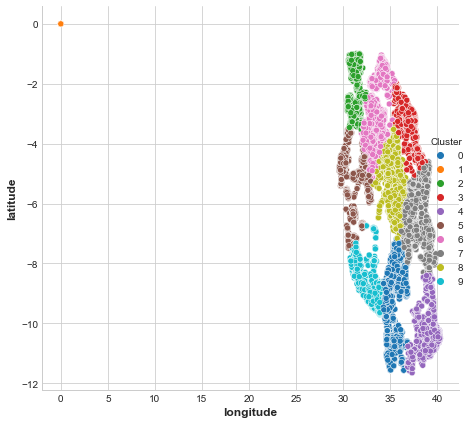

In [34]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=df, height=6,
);

#### Using feature importance
#### 1. Randomforest

In [26]:
X_train, X_test = train_test_split(df[:59400], test_size = 0.2, random_state = 4)
X_train

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
42502,0.0,507,1149,478,37.655202,-3.207821,40541,0,5,12844,...,6,2,3,3,5,3,1,1,1,functional
28577,0.0,2108,0,2296,34.007582,-3.479772,4484,0,0,3566,...,6,2,3,3,5,3,1,1,1,functional
40100,0.0,2108,0,2296,33.990860,-3.558640,35068,0,0,10023,...,5,4,1,1,7,5,0,4,3,functional
31775,0.0,2140,0,2362,34.377332,-8.704561,8175,0,6,2907,...,0,0,3,3,6,4,1,1,1,non functional
39440,0.0,507,0,442,30.976708,-1.680974,43411,0,4,4969,...,6,2,0,0,8,6,0,1,1,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55169,0.0,787,1012,976,37.664298,-3.268569,12619,0,5,16504,...,6,2,2,2,8,6,0,1,1,functional
49861,0.0,808,0,894,32.978135,-8.894408,38710,0,2,4586,...,6,2,3,3,7,5,0,4,3,functional
27063,0.0,2108,0,2292,33.484418,-4.578889,26837,0,0,10827,...,3,3,2,2,7,5,0,4,3,functional
8366,0.0,507,732,637,37.356001,-3.407829,16097,0,5,19262,...,6,2,2,2,8,6,0,1,1,functional needs repair


In [27]:
 #train_values  59,400
 #test_values 14,850

In [28]:
# X = df[:5940].copy()
# y=X.pop('status_group')
y_train = X_train.pop('status_group')
# X_test = test.copy()
y_test = X_test.pop('status_group')

In [183]:
clf=RandomForestClassifier(criterion='gini',   #entropy
                          min_samples_split=2,
                          min_samples_leaf=1,
                          max_features='auto',
                          oob_score=False,
                          random_state=1,
                           n_jobs=-1
                          ) 
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("The accuracy of the Decision Tree is",format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.8053030303030303


In [242]:
# predictiontrain

Feature: 0, Score: 0.02314
Feature: 1, Score: 0.03476
Feature: 2, Score: 0.04786
Feature: 3, Score: 0.02846
Feature: 4, Score: 0.08797
Feature: 5, Score: 0.08599
Feature: 6, Score: 0.06392
Feature: 7, Score: 0.00133
Feature: 8, Score: 0.01275
Feature: 9, Score: 0.06069
Feature: 10, Score: 0.01463
Feature: 11, Score: 0.01473
Feature: 12, Score: 0.01634
Feature: 13, Score: 0.02483
Feature: 14, Score: 0.04247
Feature: 15, Score: 0.03432
Feature: 16, Score: 0.01253
Feature: 17, Score: 0.04089
Feature: 18, Score: 0.01815
Feature: 19, Score: 0.01648
Feature: 20, Score: 0.02375
Feature: 21, Score: 0.01312
Feature: 22, Score: 0.00626
Feature: 23, Score: 0.01674
Feature: 24, Score: 0.01467
Feature: 25, Score: 0.00944
Feature: 26, Score: 0.00856
Feature: 27, Score: 0.05978
Feature: 28, Score: 0.07337
Feature: 29, Score: 0.01374
Feature: 30, Score: 0.01111
Feature: 31, Score: 0.00510
Feature: 32, Score: 0.03350
Feature: 33, Score: 0.02860


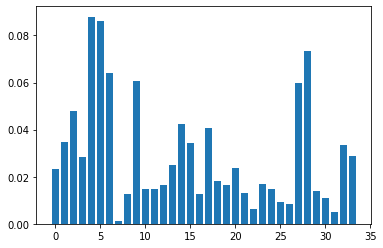

In [184]:
importance=clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Sequential feature selection 

#### 1.Randomforest

In [188]:
X = df[:59400].copy()
y=X.pop('status_group')

X_eval = df[59400:].copy()
c=X_eval.pop('status_group')
# y_test = X_test.pop('status_group')
c

59400    NaN
59401    NaN
59402    NaN
59403    NaN
59404    NaN
        ... 
74245    NaN
74246    NaN
74247    NaN
74248    NaN
74249    NaN
Name: status_group, Length: 14850, dtype: object

In [189]:
X

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,1547,1390,1648,34.938093,-9.856322,45683,0,1,13116,...,0,6,2,1,1,8,6,0,1,1
1,0.0,521,1399,571,34.698766,-2.147466,45426,0,4,17596,...,2,6,2,2,2,5,3,1,1,1
2,25.0,923,686,2317,37.460664,-3.821329,17767,0,5,10096,...,5,6,2,1,1,0,1,1,2,1
3,0.0,1960,263,2034,38.486161,-11.155298,45537,0,7,9998,...,2,6,2,0,0,3,0,0,2,1
4,0.0,19,0,131,31.130847,-1.825359,43411,0,4,8583,...,2,6,2,3,3,5,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,485,1210,225,37.169807,-3.253847,633,0,5,6315,...,5,6,2,1,1,8,6,0,1,1
59396,4700.0,195,1212,291,35.249991,-9.070629,29455,0,6,3323,...,0,6,2,1,1,6,4,1,1,1
59397,0.0,1972,0,2035,34.017087,-8.750434,34135,0,6,9784,...,1,1,1,1,1,3,0,0,4,3
59398,0.0,991,0,1310,35.861315,-6.378573,36304,0,6,15553,...,2,6,2,2,2,7,5,0,4,3


In [190]:
sfs1 = SFS(RandomForestClassifier(criterion='gini',   #with sqrrfs 0.6948, with out sqrrfs 68.88
                          min_samples_split=5,
                          min_samples_leaf=1,
                          max_features='auto',
                          oob_score=False,
                          random_state=1,
                           n_jobs=-1
                        
                          ) , 
           k_features=X.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.7min finished

[2021-09-17 19:07:11] Features: 1/36 -- score: 0.6521380471380471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  4.6min finished

[2021-09-17 19:11:46] Features: 2/36 -- score: 0.7217676767676767[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  4.3min finished

[2021-09-17 19:16:04] Features: 3/36 -- score: 0.7578114478114479[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.9min finished

[2021-09-17 21:10:08] Features: 28/36 -- score: 0.8136531986531986[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.9min finished

[2021-09-17 21:13:04] Features: 29/36 -- score: 0.8148316498316499[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min finished

[2021-09-17 21:15:16] Features: 30/36 -- score: 0.8139562289562289[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.9min finished

[2021-09-17 21:17:09] Features: 31/

In [191]:
sfdf1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
sfdf1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)","[0.6468013468013468, 0.6525252525252525, 0.658...",0.652138,"(ward,)",0.004813,0.003745,0.001873
2,"(14, 30)","[0.7207912457912458, 0.7205387205387206, 0.726...",0.721768,"(ward, quantity_group)",0.003458,0.002691,0.001345
3,"(14, 30, 34)","[0.7628787878787879, 0.7568181818181818, 0.757...",0.757811,"(ward, quantity_group, waterpoint_type)",0.003627,0.002822,0.001411
4,"(1, 14, 30, 34)","[0.7718855218855218, 0.7714646464646465, 0.772...",0.77069,"(funder, ward, quantity_group, waterpoint_type)",0.002128,0.001656,0.000828
5,"(1, 13, 14, 30, 34)","[0.7823232323232323, 0.7812289562289563, 0.778...",0.779057,"(funder, lga, ward, quantity_group, waterpoint...",0.003155,0.002454,0.001227
6,"(1, 13, 14, 20, 30, 34)","[0.7877104377104377, 0.7846801346801346, 0.787...",0.786061,"(funder, lga, ward, extraction_type, quantity_...",0.001552,0.001208,0.000604
7,"(1, 13, 14, 19, 20, 30, 34)","[0.7930976430976431, 0.7897306397306397, 0.795...",0.79133,"(funder, lga, ward, construction_year, extract...",0.003394,0.00264,0.00132
8,"(1, 13, 14, 19, 20, 26, 30, 34)","[0.798063973063973, 0.7951178451178451, 0.7982...",0.795337,"(funder, lga, ward, construction_year, extract...",0.003188,0.00248,0.00124
9,"(1, 13, 14, 15, 19, 20, 26, 30, 34)","[0.8028619528619528, 0.7966329966329966, 0.798...",0.798013,"(funder, lga, ward, population, construction_y...",0.003412,0.002655,0.001327
10,"(1, 4, 13, 14, 15, 19, 20, 26, 30, 34)","[0.805976430976431, 0.798989898989899, 0.80479...",0.802727,"(funder, longitude, lga, ward, population, con...",0.003158,0.002457,0.001229


In [192]:
sfdf1.avg_score.max()

0.8148316498316499

In [193]:
sfdf1.loc[sfdf1.avg_score==sfdf1.avg_score.max()]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
29,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8203703703703704, 0.812962962962963, 0.8156...",0.814832,"(amount_tsh, funder, gps_height, longitude, la...",0.004016,0.003124,0.001562


In [194]:
selected_feat1=list(sfdf1.loc[29, 'feature_idx'])
z=X.iloc[:,selected_feat1] #iloc[:,[1,2]]

In [195]:
z.columns

Index(['amount_tsh', 'funder', 'gps_height', 'longitude', 'latitude',
       'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'quantity_group', 'source', 'source_type',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

#### 2.Using cat boost 

In [56]:
sfs2 = SFS(CatBoostClassifier(n_estimators=100, verbose=False), 
           k_features=X.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)
sfs2 = sfs2.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  3.5min finished

[2021-09-14 17:26:31] Features: 1/37 -- score: 0.6481986531986532[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.0min finished

[2021-09-14 17:30:31] Features: 2/37 -- score: 0.6971548821548821[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  4.1min finished

[2021-09-14 17:34:37] Features: 3/37 -- score: 0.7326262626262626[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.5min finished

[2021-09-14 19:12:32] Features: 28/37 -- score: 0.7870707070707071[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.3min finished

[2021-09-14 19:14:49] Features: 29/37 -- score: 0.7893939393939393[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.1min finished

[2021-09-14 19:16:53] Features: 30/37 -- score: 0.7876936026936028[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min finished

[2021-09-14 19:18:43] Features: 31/

In [57]:
sfdf2 = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfdf2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(27,)","[0.6470538720538721, 0.6432659932659933, 0.648...",0.648199,"(quantity,)",0.003831,0.002981,0.00149
2,"(27, 32)","[0.6977272727272728, 0.694949494949495, 0.6968...",0.697155,"(quantity, waterpoint_type)",0.003841,0.002989,0.001494
3,"(13, 27, 32)","[0.7321548821548821, 0.7321548821548821, 0.737...",0.732626,"(lga, quantity, waterpoint_type)",0.003831,0.002981,0.00149
4,"(13, 17, 27, 32)","[0.7497474747474747, 0.7455387205387205, 0.752...",0.748535,"(lga, construction_year, quantity, waterpoint_...",0.002952,0.002297,0.001148
5,"(13, 17, 23, 27, 32)","[0.760016835016835, 0.7592592592592593, 0.7597...",0.759444,"(lga, construction_year, payment, quantity, wa...",0.002176,0.001693,0.000847
6,"(13, 17, 23, 27, 29, 32)","[0.7675084175084175, 0.7640572390572391, 0.771...",0.76697,"(lga, construction_year, payment, quantity, so...",0.004369,0.003399,0.0017
7,"(13, 17, 18, 23, 27, 29, 32)","[0.7727272727272727, 0.7716329966329967, 0.775...",0.772121,"(lga, construction_year, extraction_type, paym...",0.003057,0.002378,0.001189
8,"(5, 13, 17, 18, 23, 27, 29, 32)","[0.7793771043771044, 0.7748316498316499, 0.782...",0.776936,"(latitude, lga, construction_year, extraction_...",0.004302,0.003347,0.001674
9,"(5, 13, 17, 18, 23, 27, 29, 32, 35)","[0.7790404040404041, 0.7792087542087542, 0.781...",0.779242,"(latitude, lga, construction_year, extraction_...",0.001924,0.001497,0.000748
10,"(1, 5, 13, 17, 18, 23, 27, 29, 32, 35)","[0.778956228956229, 0.7793771043771044, 0.7813...",0.779428,"(funder, latitude, lga, construction_year, ext...",0.00297,0.002311,0.001156


In [58]:
sfdf2.avg_score.max()

0.7893939393939393

In [59]:
sfdf2.loc[sfdf2.avg_score==sfdf2.avg_score.max()]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
29,"(0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16,...","[0.7930976430976431, 0.7865319865319865, 0.789...",0.789394,"(amount_tsh, funder, gps_height, installer, lo...",0.002775,0.002159,0.00108


In [61]:
selected_feat2=list(sfdf2.loc[29, 'feature_idx'])
c=X.iloc[:,selected_feat2] #iloc[:,[1,2]]

In [62]:
c.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'scheme_management', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management_group', 'payment', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'ryear', 'rmonth', 'rday'],
      dtype='object')

In [229]:
selected_feat2

[0, 1, 2, 3]

#### 3.Using XGboost 

In [84]:
import xgboost as xgb
xgboost=xgb.XGBClassifier(objective ="multi:softmax", colsample_bytree = 0.01, learning_rate = 0.001, max_depth = 6, alpha = 0.1, n_estimators = 100)

In [294]:
# sfs3 = SFS(xgboost, 
#            k_features=X.shape[1], 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='accuracy',
#            cv=5)
# sfs3 = sfs3.fit(X, y)

In [293]:
# sfdf3 = pd.DataFrame.from_dict(sfs3.get_metric_dict()).T
# sfdf3.avg_score.max()

In [292]:
# sfdf3 # xgboost accuarcy

In [291]:
# sfdf3.loc[sfdf3.avg_score==sfdf3.avg_score.max()]

In [290]:
# selected_feat3=list(sfdf3.loc[6, 'feature_idx'])
# X.iloc[:,selected_feat3] #iloc[:,[1,2]]